In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib as mpl
PATH = '/Users/zachary/Desktop/'
zhfont = mpl.font_manager.FontProperties(fname=PATH + 'simhei.ttf')

import warnings
warnings.filterwarnings("ignore")


In [2]:
PATH = 'data/'
FileName = 'processed_data.xlsx'

In [3]:
DF = pd.read_excel(PATH + FileName)
DF.head()

,样本编号,时间,"硫含量,μg/g",辛烷值RON,"饱和烃,v%（烷烃+环烷烃）","烯烃,v%","芳烃,v%","溴值 ,gBr/100g","密度(20℃), kg/m³","硫含量,μg/g.1",...,S-ZORB.CAL_1.CANGLIANG.PV,S-ZORB.FT_1006.DACA.PV,S-ZORB.FT_5204.DACA.PV,S-ZORB.FT_1006.TOTALIZERA.PV,S-ZORB.FT_5204.TOTALIZERA.PV,S-ZORB.FT_1503.DACA.PV,S-ZORB.FT_1503.TOTALIZERA.PV,S-ZORB.FT_1504.DACA.PV,S-ZORB.FT_1504.TOTALIZERA.PV,S-ZORB.PC_1001A.PV
0,1,2020/5/26 8:00:00,188.0,90.6,53.230000,24.400000,22.370000,61.487143,726.085714,3.2,...,2.045436,0,0,83086802.0,832503.795,2216.40935,39063124.5,1840.14470,39608757.0,0.353271
1,2,2020/5/21 8:00:00,169.0,90.5,52.300000,26.400000,21.300000,61.880000,731.300000,3.2,...,2.025974,0,0,82318954.0,803462.665,2370.58740,38810581.5,1641.73260,39389299.0,0.354504
2,3,2020/5/19 8:00:00,177.0,90.7,52.300000,26.314286,21.385714,61.722857,729.614286,3.2,...,1.964696,0,0,82012004.0,791925.055,2326.46535,38693812.0,1600.67575,39312616.5,0.350181
3,4,2020/5/14 8:00:00,159.0,90.4,52.300000,26.100000,21.600000,61.330000,725.400000,3.2,...,2.039041,0,0,81231373.5,762863.810,2495.22360,38410862.5,1563.71215,39120204.5,0.353930
4,5,2020/5/12 8:00:00,173.0,89.6,52.242857,26.671429,21.085714,61.332857,725.428571,3.2,...,1.986900,0,0,80915707.5,751362.300,2807.78910,38283000.0,1554.35740,39045953.5,0.358053


## 探索性研究原始的325个样本数据能否被分成两类

In [4]:
data_id = DF['样本编号'].values
data_time = DF['时间'].values
data_unable = np.array(DF.values[:,2:16], dtype=np.float)
data_able = np.array(DF.values[:,16:], dtype=np.float)

In [5]:
from sklearn.cluster import KMeans
data_unable_stad = data_unable/np.max(data_unable, axis=0)

model = KMeans(n_clusters=2)
model.fit(data_unable_stad)
labels = model.labels_

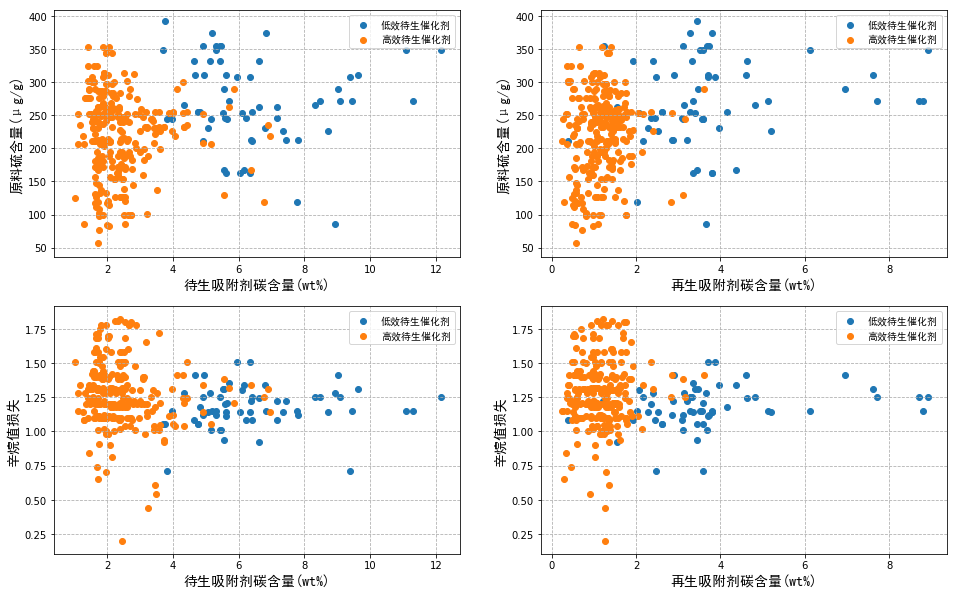

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
plt.scatter(data_unable[np.where(labels==0)[0],10], data_unable[np.where(labels==0)[0],0], label='低效待生催化剂')
plt.scatter(data_unable[np.where(labels==1)[0],10], data_unable[np.where(labels==1)[0],0], label='高效待生催化剂')
plt.grid(linestyle='--')
plt.legend(prop=zhfont)
plt.xlabel('待生吸附剂碳含量(wt%)',fontproperties=zhfont, fontsize=14)
plt.ylabel('原料硫含量(μg/g)',fontproperties=zhfont, fontsize=14)

plt.subplot(2,2,2)
plt.scatter(data_unable[np.where(labels==0)[0],12], data_unable[np.where(labels==0)[0],0], label='低效待生催化剂')
plt.scatter(data_unable[np.where(labels==1)[0],12], data_unable[np.where(labels==1)[0],0], label='高效待生催化剂')
plt.grid(linestyle='--')
plt.legend( prop=zhfont )
plt.xlabel('再生吸附剂碳含量(wt%)',fontproperties=zhfont, fontsize=14)
plt.ylabel('原料硫含量(μg/g)',fontproperties=zhfont, fontsize=14)

plt.subplot(2,2,3)
plt.scatter(data_unable[np.where(labels==0)[0],10], data_unable[np.where(labels==0)[0],9], label='低效待生催化剂')
plt.scatter(data_unable[np.where(labels==1)[0],10], data_unable[np.where(labels==1)[0],9], label='高效待生催化剂')
plt.grid(linestyle='--')
plt.legend(prop=zhfont)
plt.xlabel('待生吸附剂碳含量(wt%)',fontproperties=zhfont, fontsize=14)
plt.ylabel('辛烷值损失',fontproperties=zhfont, fontsize=14)

plt.subplot(2,2,4)
plt.scatter(data_unable[np.where(labels==0)[0],12], data_unable[np.where(labels==0)[0],9], label='低效待生催化剂')
plt.scatter(data_unable[np.where(labels==1)[0],12], data_unable[np.where(labels==1)[0],9], label='高效待生催化剂')
plt.grid(linestyle='--')
plt.legend( prop=zhfont )
plt.xlabel('再生吸附剂碳含量(wt%)',fontproperties=zhfont, fontsize=14)
plt.ylabel('辛烷值损失',fontproperties=zhfont, fontsize=14)


plt.show()

In [7]:
# s_diff 表示的是FCC前后硫含量的变化，s_RON表示FCC前后RON值的变化，两者都是变化的百分比
S_diff = ((data_unable[:,0] - data_unable[:,7])/data_unable[:,0]).reshape((-1,1))
RON_diff = (data_unable[:,9]/data_unable[:,1]).reshape((-1,1))
Eff_idx = S_diff/(1+RON_diff)

ceoff  = ((data_unable[:,10] + data_unable[:,12])/2)
for i in range(len(Eff_idx)):
    Eff_idx[i] = Eff_idx[i] ** (1/ceoff [i])
Eff_idx.shape

(325, 1)

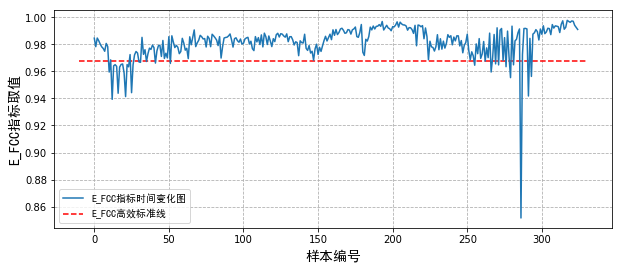

In [8]:
plt.figure(figsize=(10,4))
plt.plot(range(len(Eff_idx)), Eff_idx, label='E_FCC指标时间变化图')
plt.hlines(0.968, -10, 330,colors = "r", linestyles = "dashed", label='E_FCC高效标准线')

plt.xlabel('样本编号',fontproperties=zhfont, fontsize=14)
plt.ylabel('E_FCC指标取值',fontproperties=zhfont, fontsize=14)

plt.grid(linestyle='--')
plt.legend(prop=zhfont)
plt.show()


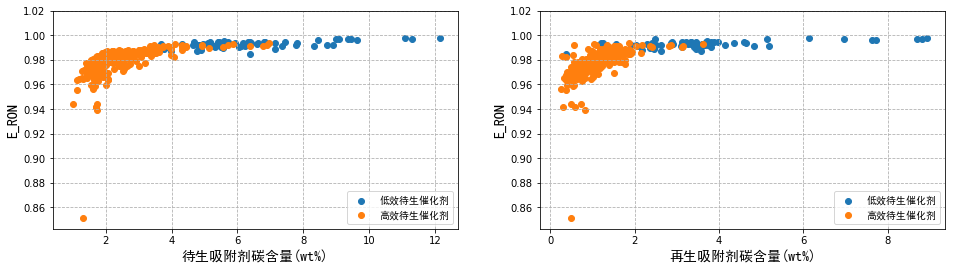

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.scatter(data_unable[np.where(labels==0)[0],10], Eff_idx[np.where(labels==0)[0]], label='低效待生催化剂')
plt.scatter(data_unable[np.where(labels==1)[0],10], Eff_idx[np.where(labels==1)[0]], label='高效待生催化剂')
plt.grid(linestyle='--')
plt.legend(prop=zhfont)
plt.xlabel('待生吸附剂碳含量(wt%)',fontproperties=zhfont, fontsize=14)
plt.ylabel('E_RON',fontproperties=zhfont, fontsize=14)

plt.subplot(1,2,2)
plt.scatter(data_unable[np.where(labels==0)[0],12], Eff_idx[np.where(labels==0)[0]], label='低效待生催化剂')
plt.scatter(data_unable[np.where(labels==1)[0],12], Eff_idx[np.where(labels==1)[0]], label='高效待生催化剂')
plt.grid(linestyle='--')
plt.legend(prop=zhfont)
plt.xlabel('再生吸附剂碳含量(wt%)',fontproperties=zhfont, fontsize=14)
plt.ylabel('E_RON',fontproperties=zhfont, fontsize=14)

plt.show()

定义了一个指标来表明FCC过程是否高效

## 对可操控的数据进行随机森林

In [10]:
DF = pd.read_excel(PATH + 'able_data.xlsx')
df_corr = DF.corr()
df_corr

,S-ZORB.CAL_H2.PV,S-ZORB.PDI_2102.PV,S-ZORB.PT_2801.PV,S-ZORB.FC_2801.PV,S-ZORB.TE_2103.PV,S-ZORB.TE_2005.PV,S-ZORB.PT_2101.PV,S-ZORB.PDT_2104.PV,S-ZORB.SIS_PDT_2103B.PV,S-ZORB.TC_2101.PV,...,S-ZORB.CAL.LEVEL.PV,S-ZORB.RXL_0001.AUXCALCA.PV,S-ZORB.CAL_1.CANGLIANG.PV,S-ZORB.FT_1006.TOTALIZERA.PV,S-ZORB.FT_5204.TOTALIZERA.PV,S-ZORB.FT_1503.DACA.PV,S-ZORB.FT_1503.TOTALIZERA.PV,S-ZORB.FT_1504.DACA.PV,S-ZORB.FT_1504.TOTALIZERA.PV,S-ZORB.PC_1001A.PV
S-ZORB.CAL_H2.PV,1.000000,0.435587,-0.277335,-0.567722,-0.070617,-0.319897,-0.410686,0.582632,-0.676207,-0.311412,...,-0.298978,0.076555,-0.465484,-0.489639,-0.648894,-0.212962,0.449740,0.188200,0.458904,0.596220
S-ZORB.PDI_2102.PV,0.435587,1.000000,0.304542,-0.544920,-0.162863,-0.382782,0.112939,0.780190,-0.575745,0.067223,...,-0.161889,-0.020417,-0.606819,-0.039361,-0.400727,-0.170485,0.850186,0.044004,0.836943,0.511908
S-ZORB.PT_2801.PV,-0.277335,0.304542,1.000000,-0.099900,0.038153,-0.074172,0.964744,0.174814,-0.023927,0.063999,...,0.074232,0.008998,-0.285604,0.299659,0.154775,-0.397410,0.277631,0.359216,0.293182,0.046625
S-ZORB.FC_2801.PV,-0.567722,-0.544920,-0.099900,1.000000,-0.016967,0.405817,0.063921,-0.726084,0.921119,0.256610,...,0.192178,0.092127,0.721643,0.582932,0.796151,0.213845,-0.634857,-0.142727,-0.650464,-0.909921
S-ZORB.TE_2103.PV,-0.070617,-0.162863,0.038153,-0.016967,1.000000,0.832206,-0.002181,0.066636,0.011597,-0.137714,...,0.505855,0.350267,0.065419,0.209311,0.195200,0.019020,0.021045,-0.024149,0.038232,0.024931
S-ZORB.TE_2005.PV,-0.319897,-0.382782,-0.074172,0.405817,0.832206,1.000000,-0.044232,-0.256327,0.447377,0.043828,...,0.515275,0.385099,0.380991,0.504430,0.552664,0.169748,-0.215509,-0.141361,-0.204089,-0.409896
S-ZORB.PT_2101.PV,-0.410686,0.112939,0.964744,0.063921,-0.002181,-0.044232,1.000000,-0.083738,0.158518,0.087028,...,0.023496,-0.051486,-0.122833,0.307635,0.267618,-0.344439,0.038060,0.345157,0.053406,-0.127361
S-ZORB.PDT_2104.PV,0.582632,0.780190,0.174814,-0.726084,0.066636,-0.256327,-0.083738,1.000000,-0.795938,-0.140132,...,0.022285,0.140236,-0.676941,-0.188242,-0.577458,-0.241584,0.923125,0.095259,0.922439,0.754624
S-ZORB.SIS_PDT_2103B.PV,-0.676207,-0.575745,-0.023927,0.921119,0.011597,0.447377,0.158518,-0.795938,1.000000,0.336090,...,0.171294,0.079331,0.724108,0.669492,0.894328,0.285346,-0.661853,-0.195860,-0.675163,-0.988715
S-ZORB.TC_2101.PV,-0.311412,0.067223,0.063999,0.256610,-0.137714,0.043828,0.087028,-0.140132,0.336090,1.000000,...,0.040776,-0.228936,0.159019,0.363725,0.332272,0.095434,-0.037756,-0.059231,-0.036555,-0.333464


In [11]:
col_name = list(DF.columns)
data_able = DF.values

# able_data 数据预处理，去掉nan值
for j in range(data_able.shape[1]):
    nan_idx, unan_idx = [],[] 
    for i in range(data_able.shape[0]):
        if np.isnan(data_able[i,j]):
            data_able[i,j] = 0

In [12]:
from sklearn.ensemble import RandomForestRegressor
model_select = RandomForestRegressor(max_depth=4)
model_select.fit(data_able/(1+np.max(data_able ,axis=0)), np.array(Eff_idx, dtype=np.float))


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [13]:
importance = model_select.feature_importances_
indices = np.argsort(importance)[::-1]

nan_RON_name = []
for f in range(data_able.shape[1]):
    idx = np.where(indices == f)[0]
    print('{0}): '.format(f+1), col_name[idx[0]], importance[indices[f]])
    if f <= 50:
        nan_RON_name.append(col_name[idx[0]])

1):  S-ZORB.PC_1001A.PV 0.08272055782990781
2):  S-ZORB.SIS_PT_2703 0.08182413331672792
3):  S-ZORB.FC_2702.DACA 0.0697175046561194
4):  S-ZORB.TC_2702.DACA 0.06810317952478229
5):  S-ZORB.FC_1101.PV 0.059320560841978454
6):  S-ZORB.PT_2905.DACA 0.0541689588544441
7):  S-ZORB.LT_2901.DACA 0.05361778494063755
8):  S-ZORB.TE_2901.DACA 0.04758550236997057
9):  S-ZORB.FT_2701.DACA 0.045148547887647314
10):  S-ZORB.TE_2902.DACA 0.03536933533517404
11):  S-ZORB.TE_2501.DACA 0.034065110855537165
12):  S-ZORB.PT_2501.DACA 0.031775603256636045
13):  S-ZORB.PT_2502.DACA 0.027897297100753626
14):  S-ZORB.PDT_2503.DACA 0.024763172311511268
15):  S-ZORB.ZT_2533.DACA 0.020940163854270895
16):  S-ZORB.FT_2433.DACA 0.019877953830802982
17):  S-ZORB.FT_2502.DACA 0.018897200939636448
18):  S-ZORB.FT_3001.DACA 0.017672563932370232
19):  S-ZORB.LT_2101.DACA 0.015746747756622645
20):  S-ZORB.LC_1203.DACA 0.015339223016013353
21):  S-ZORB.PC_9002.DACA 0.01287464942861588
22):  S-ZORB.LT_9001.DACA 0.01088059

In [14]:
model_select_add = RandomForestRegressor(max_depth=4)
model_select_add.fit(np.hstack((data_unable[:,1].reshape((-1,1)), data_able)), np.array(Eff_idx, dtype=np.float))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [15]:
col_name.insert(0,'辛烷值RON')

importance_add = model_select_add.feature_importances_
indices = np.argsort(importance_add)[::-1]

add_RON_name = []
for f in range(data_able.shape[1]+1):
    idx = np.where(indices == f)[0]
    print('{0}): '.format(f+1), col_name[idx[0]], importance_add[indices[f]])
    if f <= 50:
        add_RON_name.append(col_name[idx[0]])

1):  S-ZORB.PC_1001A.PV 0.157960861220565
2):  S-ZORB.TC_2801.PV 0.1011372520572124
3):  S-ZORB.TE_2501.DACA 0.08161695100278042
4):  S-ZORB.AI_2903.PV 0.0746110763786548
5):  S-ZORB.PT_2501.DACA 0.06655726188978393
6):  S-ZORB.PT_2502.DACA 0.03665969141084182
7):  S-ZORB.PDT_2503.DACA 0.03300741869507361
8):  S-ZORB.ZT_2533.DACA 0.03184038683628414
9):  S-ZORB.PC_6001.PV 0.031015708941416042
10):  S-ZORB.FT_2433.DACA 0.027403194452222123
11):  S-ZORB.FT_2502.DACA 0.026388416736588722
12):  S-ZORB.TE_2401.DACA 0.025475031135020178
13):  S-ZORB.FT_2303.DACA 0.022558776560942437
14):  S-ZORB.FT_2302.DACA 0.02118938601598106
15):  S-ZORB.TE_1203.PV 0.01964968843082577
16):  S-ZORB.LT_1301.DACA 0.017717845287844265
17):  S-ZORB.PC_1202.PV 0.015797601241331748
18):  S-ZORB.LC_1201.PV 0.014369338318015729
19):  S-ZORB.SIS_TE_2802 0.011764843591686941
20):  S-ZORB.LT_1002.DACA 0.01153168791789863
21):  S-ZORB.TE_5002.DACA 0.01103292566487985
22):  S-ZORB.FT_3301.PV 0.010070732486788669
23):  

In [16]:
stack1 = set(nan_RON_name) & set(add_RON_name)

In [17]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

rfe = RFE(estimator=LogisticRegression(), n_features_to_select=50)
rfe.fit_transform(np.hstack((data_unable[:,1].reshape((-1,1)), data_able/(1+np.max(data_able ,axis=0)) )), np.array(10*Eff_idx, dtype=np.int))

array([[ 6.65929276e-01,  2.43218574e-01,  1.73113141e-01, ...,
         9.24302591e-02,  5.92531409e-01,  2.60130639e-01],
       [ 7.27677246e-01,  2.86246342e-01,  2.90874984e-01, ...,
         1.00265161e-01,  5.28642193e-01,  2.61038431e-01],
       [ 6.73379531e-01,  2.94595325e-01,  2.00954586e-01, ...,
         1.36405864e-01,  5.15421780e-01,  2.57855113e-01],
       ...,
       [ 7.21988596e-01,  6.82046770e-01,  6.66189934e-01, ...,
         2.69616685e-01, -3.49246791e+00, -8.80187489e+01],
       [ 7.00181214e-01,  8.72153253e-01,  6.74760581e-01, ...,
         3.10999616e-01, -3.98422620e+00, -8.83966282e+01],
       [ 8.02429014e-01,  7.36391678e-01,  6.82845864e-01, ...,
         1.38324704e-02, -4.47598465e+00, -8.87745111e+01]])

In [18]:
idx = np.where(rfe.ranking_ == 1)[0]
rfe_name = np.array(col_name)[idx]

In [19]:
stack2 = set(nan_RON_name) & set(rfe_name)
stack3 = set(add_RON_name) & set(rfe_name)

In [20]:
stack_name = list(stack1 | stack2 | stack3)

In [21]:
high_corr_list = []
for name in add_RON_name:
    coff_idx = df_corr[name]
    coff_idx = np.argsort(coff_idx).values
    tmp_name_list = [name]
    
    for i in range(12):
        corr_name = col_name[np.where(coff_idx == i)[0][0]]
        tmp_name_list.append(corr_name)
        if corr_name in add_RON_name:
            add_RON_name.remove(corr_name)
    
    high_corr_list.append(tmp_name_list)

## 验证三种模型共同的结果是否与高相关操作变量组重合

In [22]:
sumss = 0
for name in stack_name:
    sums = 0
    for name_set in high_corr_list:
        if name in name_set:
            sums += 1       
    sumss += sums

In [23]:
DF_standard = pd.read_excel(PATH + '附件四：354个操作变量信息.xlsx')
name_standard = DF_standard['位号'].values
scale_standard = DF_standard['取值范围'].values
surge = DF_standard['Δ值'].values

In [24]:
def get_scale(name, name_standard):
    idx_standard = np.where(name_standard == name)[0]
    tmp_scale = scale_standard[idx_standard]
    # 找到每个操作变量的上下范围（low-high）
    if '-' == tmp_scale[0][0]:
        tmp_scale = tmp_scale[0][1:]
        idx1 = tmp_scale.index('-')
        low = -float(tmp_scale[:idx1])
        if '(' in tmp_scale:
            idx2 = tmp_scale.index('(')
            idx3 = tmp_scale.index(')')
            high = float(tmp_scale[idx2+1:idx3])
        elif '（' in tmp_scale:
            idx2 = tmp_scale.index('（')
            idx3 = tmp_scale.index('）')
            high = float(tmp_scale[idx2+1:idx3])
        else:
            high = float(tmp_scale[idx1+1:])
    else:
        low, high = tmp_scale[0].split('-')
        low, high = float(low), float(high)
    
    return low, high

In [25]:
selected_name = []

for name_set in high_corr_list:
    name_idx = []
    for name in name_set:    
        if name in name_standard:
            low, high = get_scale(name, name_standard)
            scale_value = high - low
            
            idx = np.where(name_standard == name)[0]
            surge_value = float(surge[idx])
            
            ratio = surge_value/scale_value
            name_idx.append(ratio)
    
    max_idx = np.where(np.array(name_idx) == max(name_idx))
    for tmp_name in np.array(name_set)[max_idx]:
        selected_name.append(tmp_name)
    

In [26]:
selected_name = list(set(selected_name))
selected_name

['S-ZORB.AT-0006.DACA.PV',
 'S-ZORB.PT_2301.PV',
 'S-ZORB.PT_2101.PV',
 'S-ZORB.PT_2502.DACA',
 'S-ZORB.PT_1601.DACA',
 'S-ZORB.AT-0009.DACA.PV',
 'S-ZORB.AT-0005.DACA.PV',
 'S-ZORB.PT_9403.PV',
 '辛烷值RON',
 'S-ZORB.PT_1602A.PV',
 'S-ZORB.PC_3101.DACA',
 'S-ZORB.PC_5101.PV',
 'S-ZORB.PT_2501.DACA',
 'S-ZORB.PC_1202.PV',
 'S-ZORB.PT_2905.DACA',
 'S-ZORB.PT_1201.PV',
 'S-ZORB.LC_1201.PV',
 'S-ZORB.PT_9001.PV']

计算簇内距离和簇外距离

In [27]:
DF = pd.read_excel(PATH + FileName)

In [28]:
def eucliDist(A,B):
    return np.sqrt(sum(np.power((A - B), 2)))

center_set = []
for name_set in high_corr_list:
    length = len(name_set)
    center = np.mean(DF[name_set], axis=1)
    center_set.append(center)

i = 0
for name in selected_name:
    for name_set in high_corr_list:
        if name in name_set:
            error_set = []
            for xx in name_set:
                error = eucliDist(DF[name].values/max(DF[name].values) ,DF[xx].values/max(DF[xx].values))
                if np.isnan(error):
                    error_set.append(0)
                else:
                    error_set.append(error)
            inter = np.mean(np.array(error_set))/10
            break
        
    outer = eucliDist(DF[name].values/max(DF[name].values), 1+center_set[i]/max(center_set[i]))
    if inter >= outer:
        tmp = inter
        inter = outer
        outer = tmp
    print('inter:{0:.4}, outer:{1:.4f}'.format(inter, outer))
    i += 1

inter:0.8598, outer:18.1517
inter:1.112, outer:10.6358
inter:0.8636, outer:11.8519
inter:0.342, outer:14.1901
inter:0.8225, outer:15.8203
inter:0.584, outer:16.5002
inter:12.68, outer:21.2494
inter:0.8919, outer:17.5212
inter:21.3, outer:46.0319
inter:0.5845, outer:12.0454
inter:8.849, outer:13.0164
inter:2.517, outer:8.6449
inter:0.574, outer:15.8092
inter:0.8421, outer:11.4921
inter:12.56, outer:21.2212
inter:9.556, outer:240.4247
inter:0.6454, outer:12.6357
inter:0.5538, outer:8.4897


## 生成新的数据集合，是考虑的所有变量

In [29]:
new_name = list(set(['辛烷值RON','RON损失', '硫含量,μg/g', '硫含量,μg/g.1', '焦炭,wt%', '焦炭,wt%.1'] + selected_name))
new_data = DF[new_name].values

In [30]:
FD = pd.DataFrame(new_data)
FD.columns = new_name
FD.to_csv(PATH + 'data_Q3.csv',encoding="utf_8_sig")